# Figures from Water Column Model Runs

In [2]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

# Data Science and Visualization Imports
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from pyproj import Proj

### Data Imports

In [3]:
wc_results_path = 'results_data/wc_runs_all.nc'
baseline_path = 'results_data/baseline_wc_full.nc'
input_data_path = 'results_data/usgs_data_full.csv'
locs_path = 'results_data/locs_data.csv'
wc_ds = xr.open_dataset(wc_results_path)
base_wc_ds = xr.open_dataset(baseline_path)
df = pd.read_csv(input_data_path)
locs = pd.read_csv(locs_path)

In [4]:
base_wc_ds

<xarray.Dataset>
Dimensions:     (Model Runs: 114, index: 80)
Coordinates:
  * index       (index) int32 0 1 2 3 4 5 6 7 8 9 ... 71 72 73 74 75 76 77 78 79
Dimensions without coordinates: Model Runs
Data variables:
    U Velocity  (Model Runs, index) float64 ...
    Q           (Model Runs, index) float64 ...
    Q2          (Model Runs, index) float64 ...
    Q2L         (Model Runs, index) float64 ...
    Z           (Model Runs, index) float64 ...
    Kq          (Model Runs, index) float64 ...
    nu_t        (Model Runs, index) float64 ...
Attributes:
    description:  Model run results for all sites.

In [5]:
df = (pd.merge(df, locs, how='left', on='plot_ID'))
df = df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

In [6]:
p2 = Proj(init="epsg:7131", proj="utm", zone=10)
df['Lon'], df['Lat'] = p2(df['Easting'],df['Northing'],inverse=True)
#df = df.drop(['Easting', 'Northing'], axis=1)
df.head()

c:\Users\erich\anaconda3\envs\EFMHModeling_20220915\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Season,date,site,plot_ID,Elevation,channel_dist,ave_ht,cover,vol_est,vol_calc,...,frontal_20,frontal_25,frontal_30,wc_height,Easting,Northing,Transect,Distance,Lon,Lat
0,Summer,7/28/2021,Bay,A0.5,2.1313,0.5,6.5,0.10,6500,233.351057,...,0.000000,0.0,0.0,0.6759,575481.457229,4.159935e+06,A,0.5,-122.145098,37.583378
1,Summer,7/28/2021,Bay,A2,2.3217,2.0,11.0,0.45,49500,1777.058049,...,0.000000,0.0,0.0,0.4855,575483.018742,4.159936e+06,A,2.0,-122.145080,37.583388
2,Summer,7/28/2021,Bay,A6,2.2421,6.0,19.0,0.55,104500,3751.566993,...,3734.753837,0.0,0.0,0.5651,575486.683492,4.159938e+06,A,6.0,-122.145039,37.583404
3,Summer,7/28/2021,Bay,A12,2.2417,12.0,15.0,0.75,112500,4038.768294,...,0.000000,0.0,0.0,0.5655,575492.070254,4.159941e+06,A,12.0,-122.144977,37.583428
4,Summer,7/28/2021,Bay,A24,2.2217,24.0,11.0,0.55,60500,2171.959838,...,0.000000,0.0,0.0,0.5855,575502.472088,4.159947e+06,A,24.0,-122.144859,37.583481


Compiling Data from modeling runs for analysis

In [7]:
wc_ds

<xarray.Dataset>
Dimensions:     (Model Runs: 114, index: 80)
Coordinates:
  * index       (index) int32 0 1 2 3 4 5 6 7 8 9 ... 71 72 73 74 75 76 77 78 79
Dimensions without coordinates: Model Runs
Data variables:
    U Velocity  (Model Runs, index) float64 ...
    Q           (Model Runs, index) float64 ...
    Q2          (Model Runs, index) float64 ...
    Q2L         (Model Runs, index) float64 ...
    Z           (Model Runs, index) float64 ...
    Kq          (Model Runs, index) float64 ...
    nu_t        (Model Runs, index) float64 ...
Attributes:
    description:  Model run results for all sites.

In [8]:
a = len(wc_ds['U Velocity'])
df1 = pd.DataFrame({
    'plot_ID': df['plot_ID'],
    'mean_u': ([vel.values.mean() for vel in wc_ds['U Velocity']]),
    'mean_u_25': ([vel[:20].values.mean() for vel in wc_ds['U Velocity']]),
    'mean_u_50': ([vel[:40].values.mean() for vel in wc_ds['U Velocity']]),
    'mean_u_75': ([vel[:60].values.mean() for vel in wc_ds['U Velocity']]),
    'Q2': ([val.values.max() for val in wc_ds['Q2']]),
    'Hveg/WC': df['ave_ht']/df['wc_height'],
    'wc_height': df['wc_height'],
    'avg_ht': df['ave_ht'],
    'density_total': df['density_final'],
    'frontal_total': df['frontal_total'],
    'site': df['site'],
    'lon': df['Lon'],
    'lat': df['Lat'],
    'Z': [vel.values for vel in wc_ds['Z']],
    'Runtype': np.repeat('Vegetated Run',a)
})
df2 = pd.DataFrame({
    'plot_ID': df['plot_ID'],
    'mean_u': ([vel.values.mean() for vel in base_wc_ds['U Velocity']]),
    'mean_u_25': ([vel[:20].values.mean() for vel in base_wc_ds['U Velocity']]),
    'mean_u_50': ([vel[:40].values.mean() for vel in base_wc_ds['U Velocity']]),
    'mean_u_75': ([vel[:60].values.mean() for vel in base_wc_ds['U Velocity']]),
    'Q2': ([val.values.max() for val in base_wc_ds['Q2']]),
    'Hveg/WC': df['ave_ht']/df['wc_height'],
    'wc_height': df['wc_height'],
    'avg_ht': df['ave_ht'],
    'density_total': df['density_final'],
    'frontal_total': df['frontal_total'],
    'site': df['site'],
    'lon': df['Lon'],
    'lat': df['Lat'],
    'Z': [vel.values for vel in wc_ds['Z']],
    'Runtype': np.repeat('Baseline Run',a)
})
dff = pd.concat([df1, df2])
dff.sample(5)

,plot_ID,mean_u,mean_u_25,mean_u_50,mean_u_75,Q2,Hveg/WC,wc_height,avg_ht,density_total,frontal_total,site,lon,lat,Z,Runtype
0,A0.5,3.985137,3.597413,3.790476,3.904333,0.093648,9.616807,0.6759,6.5,630.481094,1103.449997,Bay,-122.145098,37.583378,"[-67.16756249999999, -66.32268749999999, -65.4...",Baseline Run
90,I0.5,0.441773,0.101987,0.254962,0.361505,0.029911,10.533708,0.8544,9.0,5359.089301,12986.757660,Creek,-122.141929,37.583924,"[-84.90599999999998, -83.83799999999998, -82.7...",Vegetated Run
20,C72,3.776522,3.408992,3.591996,3.699925,0.084088,34.682081,0.6055,21.0,5674.329848,32084.930691,Bay,-122.143975,37.583145,"[-60.17156249999997, -59.41468749999997, -58.6...",Baseline Run
40,F2,3.689645,3.330525,3.509341,3.614800,0.080258,22.510823,0.5775,13.0,5359.089301,18758.649954,Interior,-122.143049,37.587345,"[-57.389062500000016, -56.66718750000001, -55....",Baseline Run
101,F30,3.974788,3.588066,3.780630,3.894194,0.093162,32.723487,0.6723,22.0,5359.089301,31745.407614,Interior,-122.143079,37.587595,"[-66.80981249999999, -65.96943749999998, -65.1...",Baseline Run


Calculating Mean Top and Bottom Velocities (Above and Under Vegetation in Water Column)

In [9]:
def get_top_bot_u(dataarr):
    u = dataarr.to_dataframe()
    utop = np.array([])
    ubot = []
    run_count = u.shape[0] / dataarr.shape[1]
    for i in range(int(run_count)):
        index_top = np.where(dff['Z'].iloc[i] <= (-dff['avg_ht'].iloc[i]))
        index_bot = np.where(dff['Z'].iloc[i] > (-dff['avg_ht'].iloc[i]))
        utop = np.append(utop, np.median(u['U Velocity'].iloc[index_top].values))
        ubot = np.append(ubot, np.median(u['U Velocity'].iloc[index_bot].values))
    return ubot, utop

In [10]:
ubot, utop = get_top_bot_u(wc_ds['U Velocity'])
du = ubot - utop
ubot_base, utop_base = get_top_bot_u(base_wc_ds['U Velocity'])
du_base = ubot_base - utop_base

In [11]:
df1['U Bottom'] = ubot
df2['U Bottom'] = ubot_base
dff['U Bottom'] = np.append(ubot, ubot_base)

df1['U Top'] = utop
df2['U Top'] = utop_base
dff['U Top'] = np.append(utop, utop_base)

df1['dTopBottom'] = du
df2['dTopBottom'] = du_base
dff['dTopBottom'] = np.append(du, du_base)

dff['mean_u_ratio'] = df1['mean_u']/df2['mean_u']
dff = dff.reset_index()

In [12]:
df2['U Bottom'].describe()

count    114.000000
mean       4.230503
std        0.014144
min        4.176070
25%        4.222865
50%        4.232767
75%        4.239891
max        4.254468
Name: U Bottom, dtype: float64

Dropping invalid location values from dataframe

In [13]:
#dff = dff.replace([np.inf, -np.inf], np.nan)
#dff = dff.dropna()

## EDA and Scatterplots

In [14]:
fig = px.scatter(dff, x='Q2', y='wc_height', color='site', symbol='Runtype', trendline='ols', template='plotly_dark')
fig.update_layout(
    height=500,
    autosize=True,)
fig.show()

In [15]:
fig = px.scatter(dff, x='mean_u', y='wc_height', trendline='ols', symbol='Runtype', color='site', template='plotly_dark')
fig.update_layout(
    height=500,
    autosize=True,)
fig.show()

In [16]:
fig = px.scatter(dff, x='mean_u', y='density_total', symbol='Runtype', color='site', trendline='ols', template='plotly_dark')
#fig = px.scatter(base_df, x='mean_u_25', y='density_total', symbol='site', color='site')
fig.update_layout(
    height=500,
    autosize=True,)
fig.show()

In [17]:
fig = px.scatter(dff, x='mean_u', y='Hveg/WC', symbol='Runtype', color='site', trendline='ols', template='plotly_dark')
#fig = px.scatter(base_df, x='mean_u', y='Hveg/WC', symbol='site', color='site')
fig.update_layout(
    height=500,
    autosize=True,)
fig.show()

## Jointplots

In [18]:
dff.columns

Index(['index', 'plot_ID', 'mean_u', 'mean_u_25', 'mean_u_50', 'mean_u_75',
       'Q2', 'Hveg/WC', 'wc_height', 'avg_ht', 'density_total',
       'frontal_total', 'site', 'lon', 'lat', 'Z', 'Runtype', 'U Bottom',
       'U Top', 'dTopBottom', 'mean_u_ratio'],
      dtype='object')

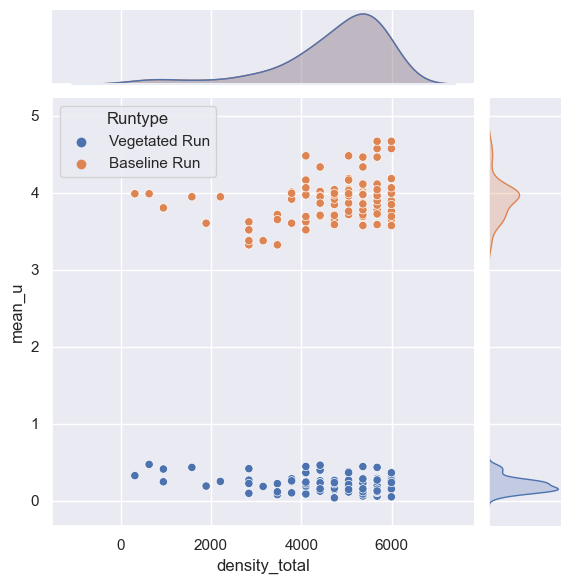

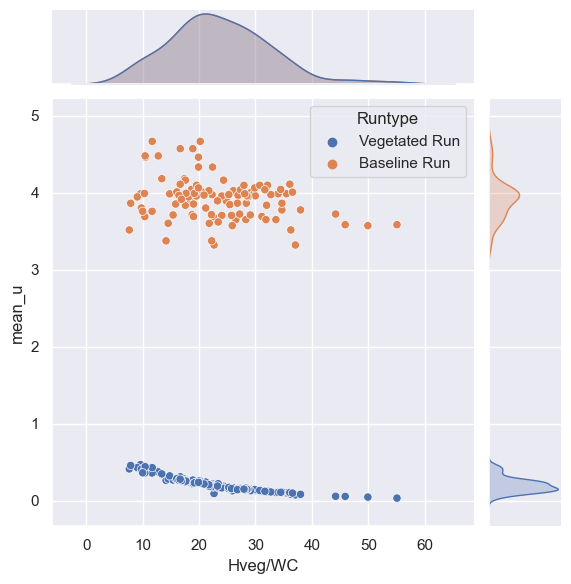

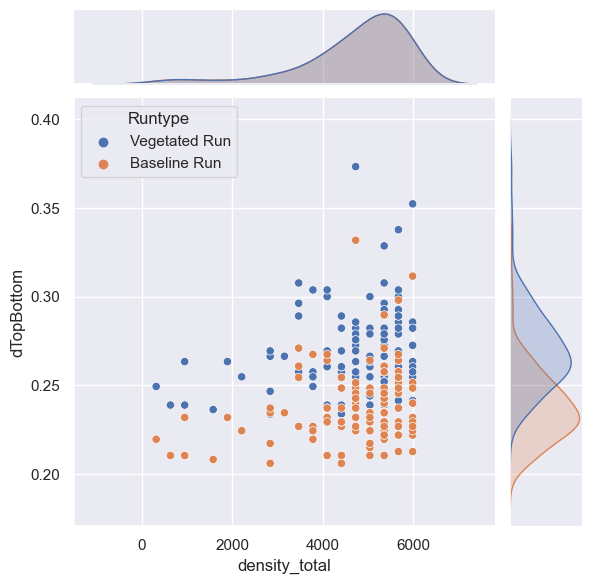

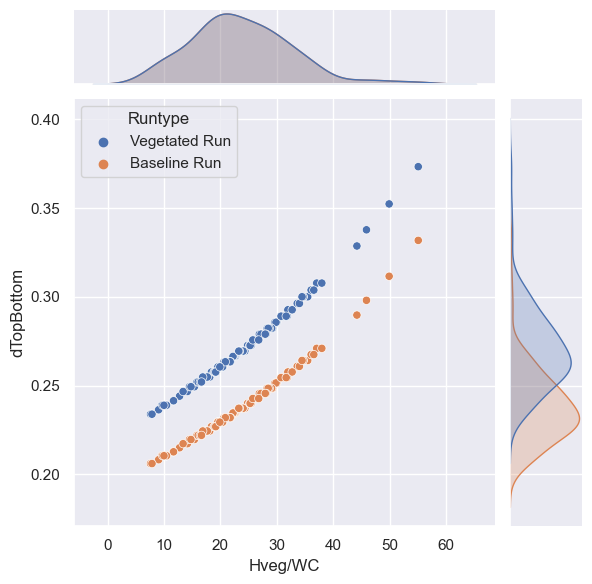

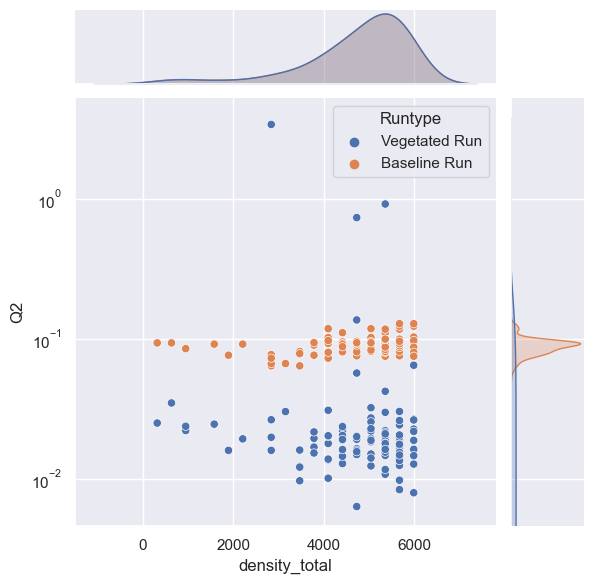

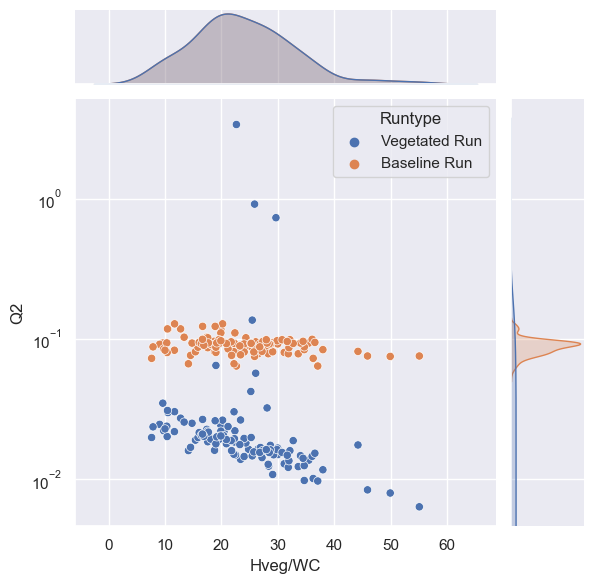

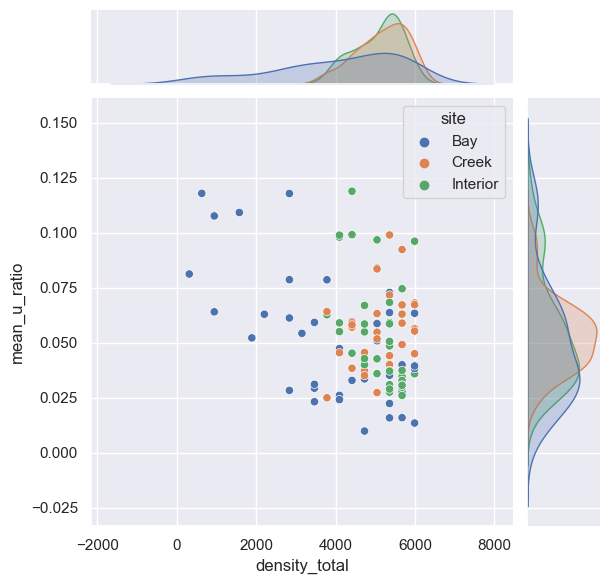

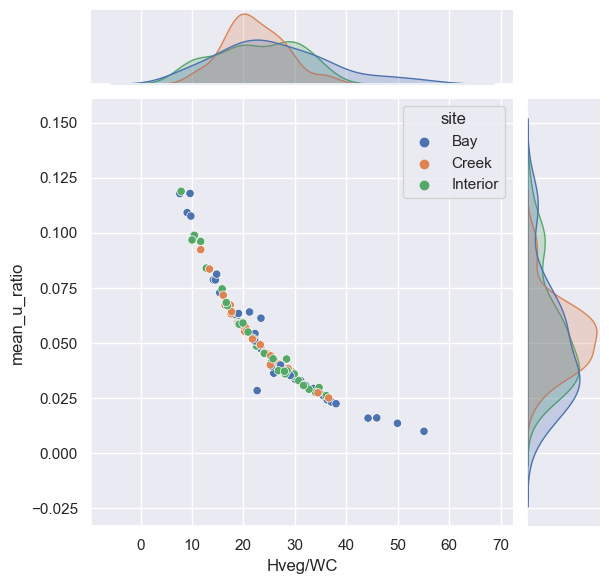

In [22]:
to_plot = ['mean_u', 'dTopBottom', 'Q2']
sns.set_theme()

for n, feature in enumerate(to_plot):
    #ax2= plt.subplot(3,2,n+2)
    if feature == 'Q2':
        g = sns.jointplot(data=dff, x='density_total', y=feature, hue='Runtype')
        h = sns.jointplot(data=dff, x='Hveg/WC', y=feature, hue='Runtype')
        g.ax_joint.set_yscale('log')
        h.ax_joint.set_yscale('log')
    else:
        sns.jointplot(data=dff, x='density_total', y=feature, hue='Runtype')
        sns.jointplot(data=dff, x='Hveg/WC', y=feature, hue='Runtype')

sns.jointplot(data=dff, x='density_total', y='mean_u_ratio', hue='site')
sns.jointplot(data=dff, x='Hveg/WC', y='mean_u_ratio', hue='site')

plt.show()

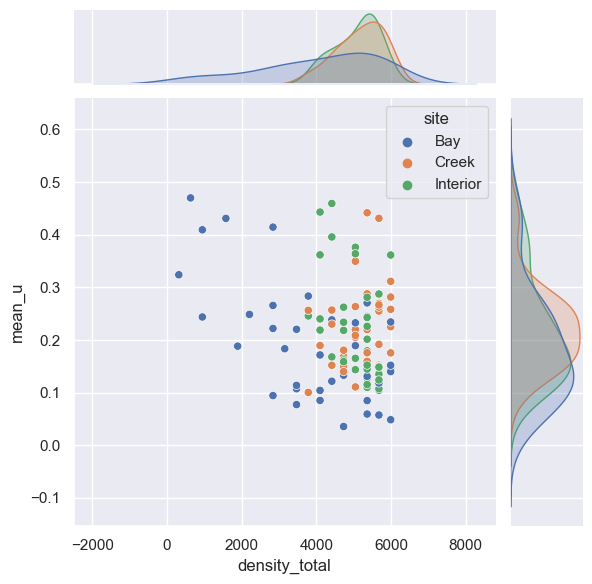

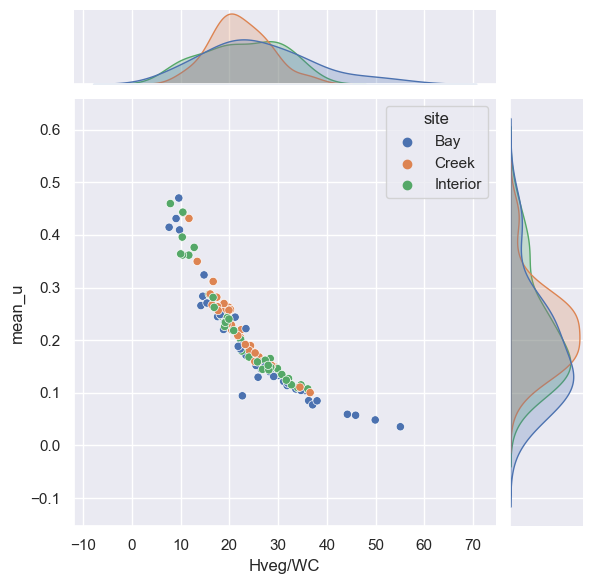

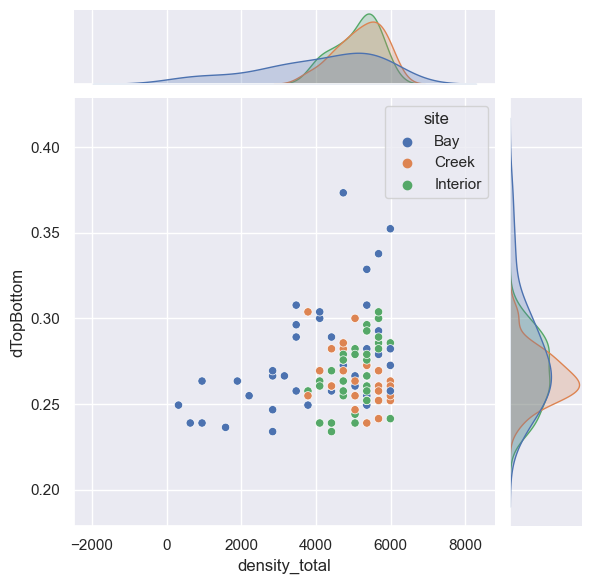

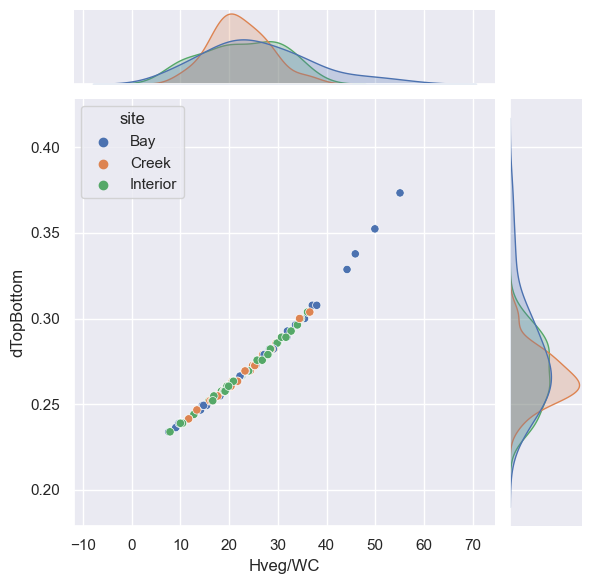

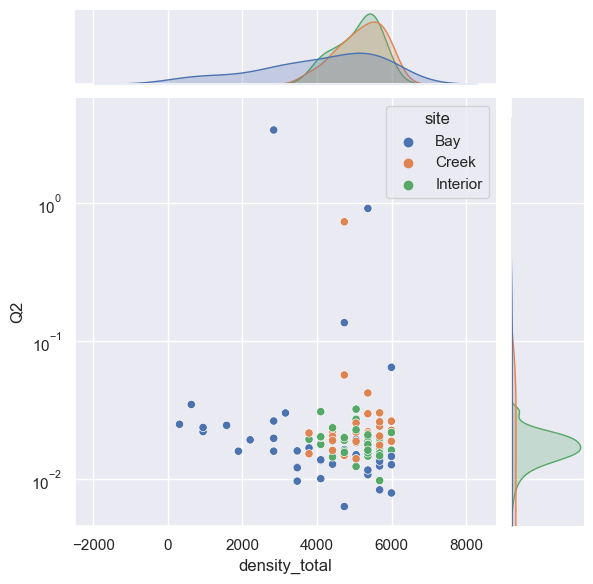

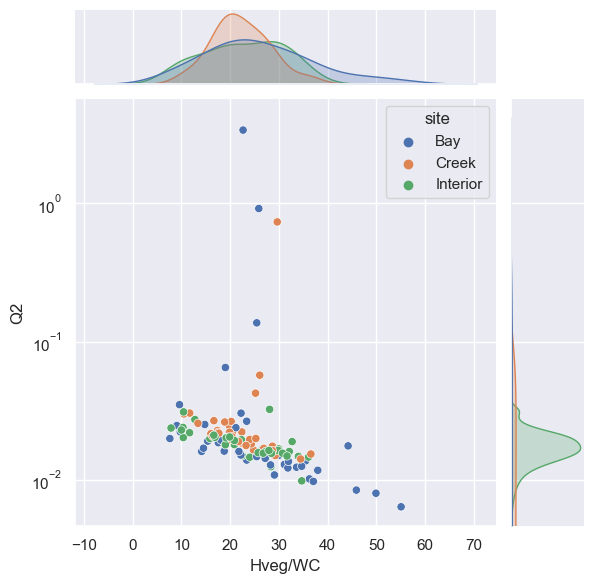

In [24]:
to_plot = ['mean_u', 'dTopBottom', 'Q2']
sns.set_theme()

for n, feature in enumerate(to_plot):
    #ax2= plt.subplot(3,2,n+2)
    if feature == 'Q2':
        g = sns.jointplot(data=df1, x='density_total', y=feature, hue='site')
        h = sns.jointplot(data=df1, x='Hveg/WC', y=feature, hue='site')
        g.ax_joint.set_yscale('log')
        h.ax_joint.set_yscale('log')
    else:
        sns.jointplot(data=df1, x='density_total', y=feature, hue='site')
        sns.jointplot(data=df1, x='Hveg/WC', y=feature, hue='site')
plt.show()

## Maps

In [ ]:
# Dropping Inf values from dataframe so map can center
dff= dff[dff['lat']!= np.inf]
dff= dff[dff['lon']!= np.inf]

In [ ]:
fig = px.scatter_mapbox(dff[dff['Runtype']=='Vegetated Run'], 
    lat="lat", 
    lon="lon", 
    color='mean_u', 
    size='Hveg/WC',
    size_max=12,
    hover_name="plot_ID", 
    hover_data=["site", "mean_u", "density_total", "Hveg/WC"], 
    zoom=15, 
    height=600)
    
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},template='plotly_dark')
fig.show()

## Water Column Profiles

In [ ]:
wc_ds

<xarray.Dataset>
Dimensions:     (Model Runs: 114, index: 80)
Coordinates:
  * index       (index) int32 0 1 2 3 4 5 6 7 8 9 ... 71 72 73 74 75 76 77 78 79
Dimensions without coordinates: Model Runs
Data variables:
    U Velocity  (Model Runs, index) float64 -0.01974 0.006983 ... 0.5054 0.508
    Q           (Model Runs, index) float64 0.04179 0.07598 ... 0.0429 0.03247
    Q2          (Model Runs, index) float64 0.001747 0.005772 ... 0.001054
    Q2L         (Model Runs, index) float64 0.0003404 0.003029 ... 0.001037
    Z           (Model Runs, index) float64 -67.17 -66.32 ... -1.351 -0.4503
    Kq          (Model Runs, index) float64 0.001629 0.007974 ... 0.006382
    nu_t        (Model Runs, index) float64 0.003192 0.01563 ... 0.03512 0.01251
Attributes:
    description:  Model run results for all sites.

Randomly sampled Vegetated Flows

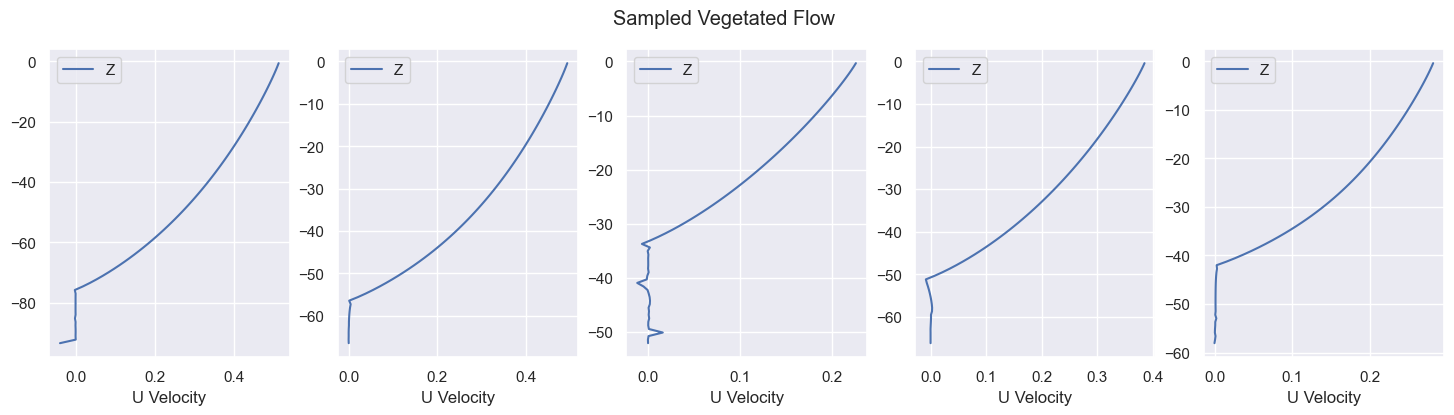

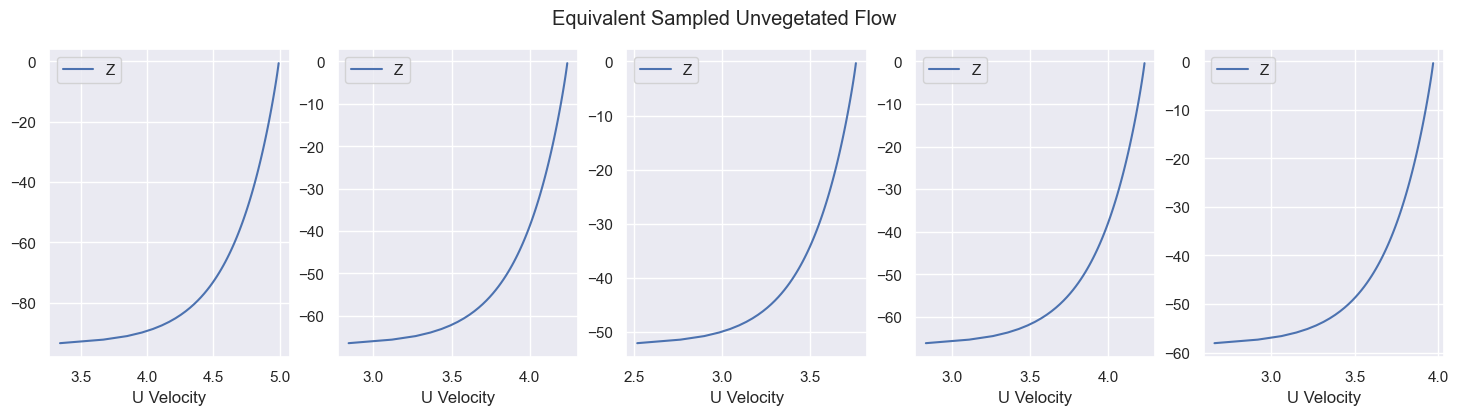

In [ ]:
fig1, axs = plt.subplots(1,5, figsize=(18,4))
fig2, axs2 = plt.subplots(1,5, figsize=(18,4))

profiles = wc_ds[['U Velocity', 'Z']].to_dataframe()
base_profiles = base_wc_ds[['U Velocity', 'Z']].to_dataframe()

axes = axs.ravel()
axes2 = axs2.ravel()
for i in range(5):
    a = np.random.randint(low=0, high=113)
    sample = profiles.loc[a]
    sample_base = base_profiles.loc[a]
    sample.plot(x='U Velocity', y='Z', ax = axes[i])
    sample_base.plot(x='U Velocity', y='Z', ax = axes2[i])

fig1.suptitle('Sampled Vegetated Flow')
fig2.suptitle('Equivalent Sampled Unvegetated Flow')

plt.show()

# Others

In [ ]:
# Visualization using Plotly
"""
fig = make_subplots(rows=4, cols=2,
                    subplot_titles=('Baseline Runs', 'Vegetated Runs'))

cbarlocs = [.85, .5, .15]

# U Mean Contour Plots
fig.add_trace(go.Contour(
        z=df2['mean_u_25'],
        x=df2['density_total'], # horizontal axis
        y=df2['Hveg/WC'],# vertical axis,
        colorbar_x=0.46,
        line_smoothing=0.85), 1, 1)
fig.add_trace(go.Contour(
        z=df1['mean_u_25'],
        x=df1['density_total'], # horizontal axis
        y=df1['Hveg/WC'],# vertical axis,
        line_smoothing=0.85), 1, 2)

# dU Contour Plots
fig.add_trace(go.Contour(
        z=df2['dTopBottom'],
        x=df2['density_total'], # horizontal axis
        y=df2['Hveg/WC'],# vertical axis,
        colorbar_x=0.46,
        colorbar_y= -1,
        line_smoothing=0.85), 2, 1)
fig.add_trace(go.Contour(
        z=df1['dTopBottom'],
        x=df1['density_total'], # horizontal axis
        y=df1['Hveg/WC'],# vertical axis,
        line_smoothing=0.85), 2, 2)

# utop/ubot Contour Plots
fig.add_trace(go.Contour(
        z=df2['U Top']/df2['U Bottom'],
        x=df2['density_total'], # horizontal axis
        y=df2['Hveg/WC'],# vertical axis,
        colorbar_x=0.46,
        line_smoothing=0.85), 3, 1)
fig.add_trace(go.Contour(
        z=df1['U Top']/df1['U Bottom'],
        x=df1['density_total'], # horizontal axis
        y=df1['Hveg/WC'],# vertical axis,
        line_smoothing=0.85), 3, 2)

# mean(Q2) Contour Plots
fig.add_trace(go.Contour(
        z=df2['Q2'],
        x=df2['density_total'], # horizontal axis
        y=df2['Hveg/WC'],# vertical axis,
        colorbar_x=0.46,
        line_smoothing=0.85), 4, 1)
fig.add_trace(go.Contour(
        z=df1['Q2'],
        x=df1['density_total'], # horizontal axis
        y=df1['Hveg/WC'],# vertical axis,
        line_smoothing=0.85), 4, 2)

# max(Q2) Contour Plots

# Bed Stress Contour Plots

#fig = go.Figure(data =
 #   go.Contour(
  #      z=dff['mean_u_25'],
   #     x=dff['density_total'], # horizontal axis
    #    y=dff['Hveg/WC'],# vertical axis,
     #))
fig.update_layout(
    title="Velocity Contour Plot",
    xaxis_title="Density",
    yaxis_title="Hveg/WC",
    width=1400,
    height=2800,
    autosize=True,
    template='plotly_dark')
fig.update_traces(showscale=False)
fig.show()
"""

'\nfig = make_subplots(rows=4, cols=2,\n                    subplot_titles=(\'Baseline Runs\', \'Vegetated Runs\'))\n\ncbarlocs = [.85, .5, .15]\n\n# U Mean Contour Plots\nfig.add_trace(go.Contour(\n        z=df2[\'mean_u_25\'],\n        x=df2[\'density_total\'], # horizontal axis\n        y=df2[\'Hveg/WC\'],# vertical axis,\n        colorbar_x=0.46,\n        line_smoothing=0.85), 1, 1)\nfig.add_trace(go.Contour(\n        z=df1[\'mean_u_25\'],\n        x=df1[\'density_total\'], # horizontal axis\n        y=df1[\'Hveg/WC\'],# vertical axis,\n        line_smoothing=0.85), 1, 2)\n\n# dU Contour Plots\nfig.add_trace(go.Contour(\n        z=df2[\'dTopBottom\'],\n        x=df2[\'density_total\'], # horizontal axis\n        y=df2[\'Hveg/WC\'],# vertical axis,\n        colorbar_x=0.46,\n        colorbar_y= -1,\n        line_smoothing=0.85), 2, 1)\nfig.add_trace(go.Contour(\n        z=df1[\'dTopBottom\'],\n        x=df1[\'density_total\'], # horizontal axis\n        y=df1[\'Hveg/WC\'],# vertical